<a href="https://colab.research.google.com/github/marthahuertas-lgtm/ACTIVIDADE-1-TOPICOS/blob/main/Actividade1Soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividade Webscraping**

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("devtools")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/devtools_2.4.5.tar.gz'
Content type 'application/x-gzip' length 374718 bytes (365 KB)
downloaded 365 KB


The downloaded source packages are in
	‘/tmp/RtmpWBtkTy/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpWBtkTy/downloaded_packages’


* **Para extraer la información de la URL**

In [ ]:
%%R
library(rvest)

In [ ]:
%%R
url<-'https://finance.yahoo.com/markets/world-indices/'
mipage<-read_html(url)

* **Extraer la tabla**

In [ ]:
%%R
tablas_html<- html_nodes(mipage, 'table')
World_Indices<- html_table(tablas_html)
head(World_Indices[[1]],5)

# A tibble: 5 × 9
  Symbol Name     ``    Price Change `Change %` Volume `Day Range` `52 Wk Range`
  <chr>  <chr>    <lgl> <chr> <chr>  <chr>      <chr>  <chr>       <chr>        
1 ^GSPC  S&P 500  NA    6,58… +51.96 +0.80%     1.624B 6,545.80 6… 4,835.04 6,5…
2 ^DJI   Dow Jon… NA    46,0… +605.… +1.33%     247.7… 45,577.09 … 36,611.78 46…
3 ^IXIC  NASDAQ … NA    22,0… +158.… +0.72%     5.978B 21,908.81 … 14,784.03 22…
4 ^NYA   NYSE Co… NA    21,5… +214.… +1.01%     0      21,294.57 … 16,820.11 21…
5 ^XAX   NYSE Am… NA    6,90… +49.64 +0.72%     0      6,827.30 6… 4,334.81 6,9…


* Información adicional como ya observamos que tipo de datos son transformar a variables númericas aquellas que estan tomando como caracter, para confirmar hacemos un summary

In [ ]:
%%R
summary(World_Indices[[1]])

    Symbol              Name                             Price          
 Length:41          Length:41          Mode:logical   Length:41         
 Class :character   Class :character   NA's:41        Class :character  
 Mode  :character   Mode  :character                  Mode  :character  
    Change            Change %            Volume           Day Range        
 Length:41          Length:41          Length:41          Length:41         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 52 Wk Range       
 Length:41         
 Class :character  
 Mode  :character  


* Vamos a eliminar una columna ya que con ella no se trabajará que son gráficos de linea

*OJO NO PUEDES VOLVER A CORRERLO PORQUE SE TE ELIMINA LA VARIABLE QUE ESTA DE 3 EN LA CORRIDA*

In [ ]:
%%R
World_Indices[[1]] <- World_Indices[[1]][ , -3]

Revisando si la eliminaste la variable que querias

In [ ]:
%%R
names(World_Indices[[1]])

[1] "Symbol"      "Name"        "Price"       "Change"      "Change %"   
[6] "Volume"      "Day Range"   "52 Wk Range"


Ahora vamos a transformar las variables en tipo númericas y cambiando los nombres

In [ ]:
%%R
df <- World_Indices[[1]]

names(df)[3:6] <- c("Price", "Change", "ChangePor", "Volumen")

names(df)

[1] "Symbol"      "Name"        "Price"       "Change"      "ChangePor"  
[6] "Volumen"     "Day Range"   "52 Wk Range"


* Vamos a tomar la variable Price para cambiarla a numerica porque esta tomando los valores de las variables siguientes

In [ ]:
%%R
raw_price <- df$Price

# Extraer solo el número antes del primer signo + o -
price <- sub("[+-].*", "", raw_price)
price <- gsub(",", "", price)
price <- as.numeric(price)
price

 [1]    6584.00   46096.40   22044.49   21509.26    6905.91     931.44
 [7]    2415.35      14.90    9297.58   23703.65    7823.52    5386.77
[13]    1613.21    4798.09      85.20   26086.32    4355.82    8805.00
[19]    9071.40   81548.73    7747.90    1582.85   13229.15    3344.20
[25]   25215.71   29411.28  143732.97   61658.31    9142.12 1813119.88
[31]    3162.56   34937.40    5956.12      97.52    2479.57     135.76
[37]     117.35    3875.31   44372.50      67.95      66.58


* Vamos a realizar tambien la trasnformación con volumen, está variable toma valores financieros los tomaremos en numeros reales para el analisis

In [ ]:
%%R
raw_volumen <- df$Volumen

# Convertir valores como "3.615B" o "579.92M" a números
volumen2 <- sapply(raw_volumen, function(x) {
  if (grepl("B", x)) {
    return(as.numeric(gsub("[^0-9\\.]", "", x)) * 1e9)
  } else if (grepl("M", x)) {
    return(as.numeric(gsub("[^0-9\\.]", "", x)) * 1e6)
  } else {
    return(as.numeric(gsub("[^0-9\\.]", "", x)))
  }
})
raw_volumen

 [1] "1.624B"   "247.717M" "5.978B"   "0"        "0"        "0"       
 [7] "0"        "0"        "0"        "0"        "0"        "0"       
[13] "0"        "0"        "1.576M"   "0"        "0"        "0"       
[19] "0"        "0"        "0"        "0"        "0"        "0"       
[25] "0"        "101.125M" "0"        "47.99M"   "1.922B"   "0"       
[31] "0"        "139.46M"  "0"        "--"       "--"       "0"       
[37] "0"        "1.572B"   "0"        "0"        "0"       


* Queremos realizar una sola tabla con las variables tipo numerico

In [ ]:
%%R
# Extraer columnas de texto directamente
symbol <- df$Symbol
name <- df$Name

# Extraer desde la columna compuesta df$Price
raw_price <- df$Price

# Precio actual (antes del signo)
price <- sub("[+-].*", "", raw_price)
price <- gsub(",", "", price)
price <- as.numeric(price)

# Cambio en puntos (entre precio y paréntesis)
Change <- sub(".*?([+-][0-9]+(?:\\.[0-9]+)?).*", "\\1", raw_price)
Change <- gsub(",", "", Change)
Change <- as.numeric(Change)

# Cambio porcentual (dentro del paréntesis)
ChangePor <- sub(".*\\(([-+0-9\\.]+)%\\).*", "\\1", raw_price)
ChangePor <- as.numeric(ChangePor)

# Volumen (convertir B y M a números reales)
raw_volumen <- df$Volumen
Volumen2 <- sapply(raw_volumen, function(x) {
  if (grepl("B", x)) {
    return(as.numeric(gsub("[^0-9\\.]", "", x)) * 1e9)
  } else if (grepl("M", x)) {
    return(as.numeric(gsub("[^0-9\\.]", "", x)) * 1e6)
  } else {
    return(as.numeric(gsub("[^0-9\\.]", "", x)))
  }
})

Vemos la tabla resultante ahora

In [ ]:
%%R
df_summary <- data.frame(
  Symbol = symbol,
  Name = name,
  Price = price,
  Change = Change,
  ChangePor = ChangePor,
  Volumen = Volumen2
)

* Revisando un summary de las variables tenemos

In [ ]:
%%R
summary(df_summary)

    Symbol              Name               Price               Change       
 Length:41          Length:41          Min.   :     14.9   Min.   :-113.94  
 Class :character   Class :character   1st Qu.:   2415.3   1st Qu.:   0.11  
 Mode  :character   Mode  :character   Median :   6905.9   Median :  14.48  
                                       Mean   :  60793.4   Mean   :  64.97  
                                       3rd Qu.:  23703.7   3rd Qu.:  63.09  
                                       Max.   :1813119.9   Max.   : 605.48  
                                                                            
   ChangePor          Volumen         
 Min.   :-2.9300   Min.   :0.000e+00  
 1st Qu.: 0.0900   1st Qu.:0.000e+00  
 Median : 0.5900   Median :0.000e+00  
 Mean   : 0.4151   Mean   :2.983e+08  
 3rd Qu.: 0.8000   3rd Qu.:0.000e+00  
 Max.   : 1.9300   Max.   :5.978e+09  
                   NA's   :2          


## ***ANALISIS EXPLORATORIO***

Queremos revisar la distribucion de algunas variables como Change y precie

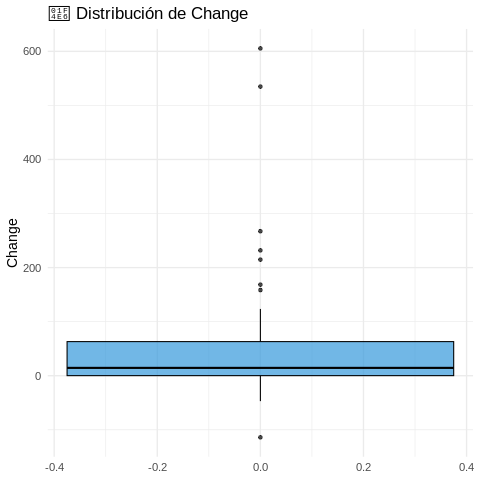

In [ ]:
%%R
ggplot(df_summary, aes(y = (Change))) +
  geom_boxplot(fill = "#3498db", color = "black", alpha = 0.7) +
  labs(title = "📦 Distribución de Change", y = "Change") +
  theme_minimal(base_size = 14)

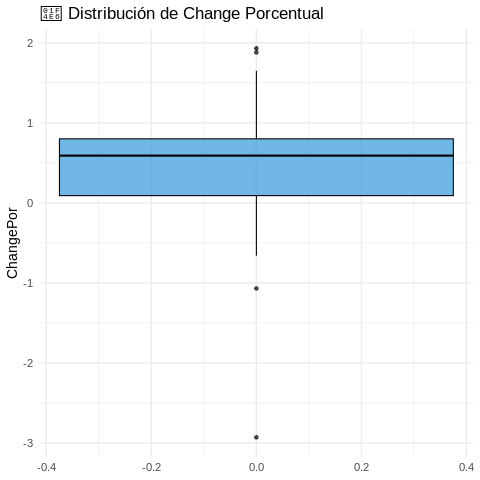

In [ ]:
%%R
ggplot(df_summary, aes(y = (ChangePor))) +
  geom_boxplot(fill = "#3498db", color = "black", alpha = 0.7) +
  labs(title = "📦 Distribución de Change Porcentual", y = "ChangePor") +
  theme_minimal(base_size = 14)

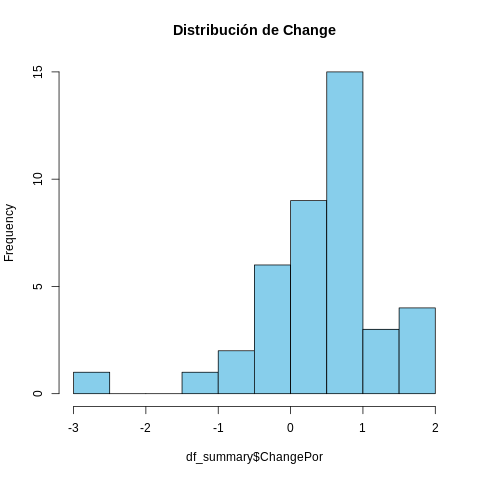

In [ ]:
%%R

hist(df_summary$ChangePor, main = "Distribución de Change", col = "skyblue", breaks = 10)


* Ahora realizaremos un gráfico de barras horizontal comparando el cambio porcentual con los symbolos

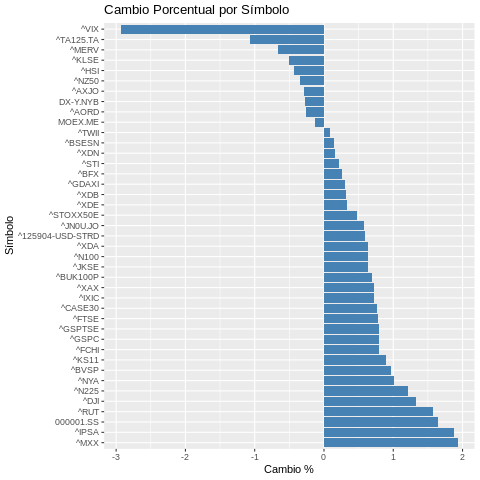

In [ ]:
%%R
library(ggplot2)

ggplot(df_summary, aes(x = reorder(Symbol, -ChangePor), y = ChangePor)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Cambio Porcentual por Símbolo", x = "Símbolo", y = "Cambio %")

* Teniendo en cuenta que esta página nos permite observar ver los indices bursatiles internacionales realizaremos un grafico con los indices bajos y altos.

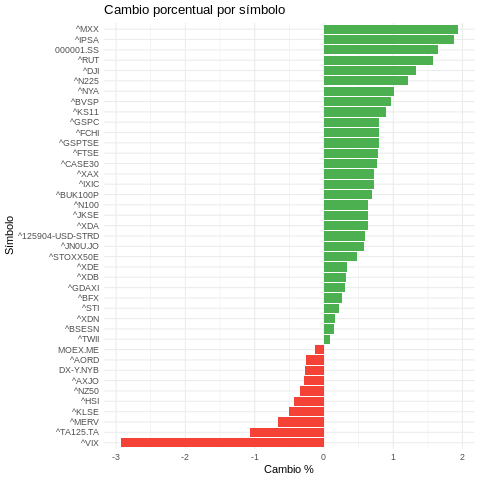

In [ ]:
%%R
library(ggplot2)

ggplot(df_summary, aes(x = reorder(Symbol, ChangePor), y = ChangePor, fill = ChangePor > 0)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  coord_flip() +
  scale_fill_manual(values = c("TRUE" = "#4CAF50", "FALSE" = "#F44336")) +
  labs(title = "Cambio porcentual por símbolo", x = "Símbolo", y = "Cambio %") +
  theme_minimal()


* Grafico de dispersión teniendo en cuenta el price y change

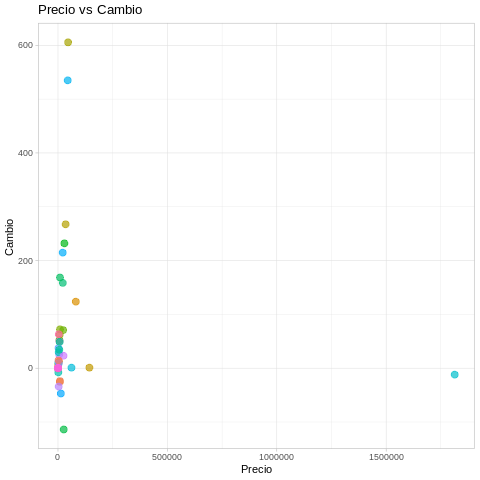

In [ ]:
%%R
ggplot(df_summary, aes(x = Price, y = Change, color = Symbol)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Precio vs Cambio ", x = "Precio", y = "Cambio ") +
  theme_light() +
  theme(legend.position = "none")

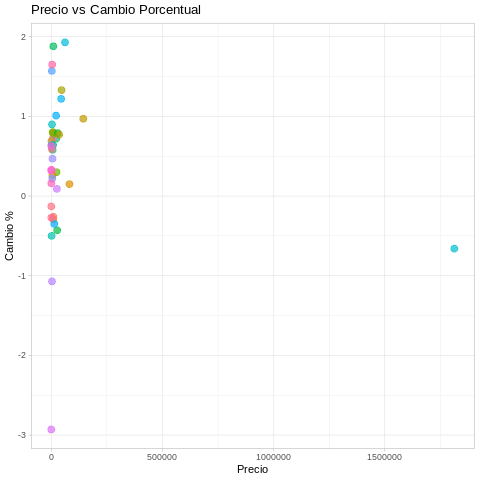

In [ ]:
%%R
ggplot(df_summary, aes(x = Price, y = ChangePor, color = Symbol)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Precio vs Cambio Porcentual ", x = "Precio", y = "Cambio %") +
  theme_light() +
  theme(legend.position = "none")

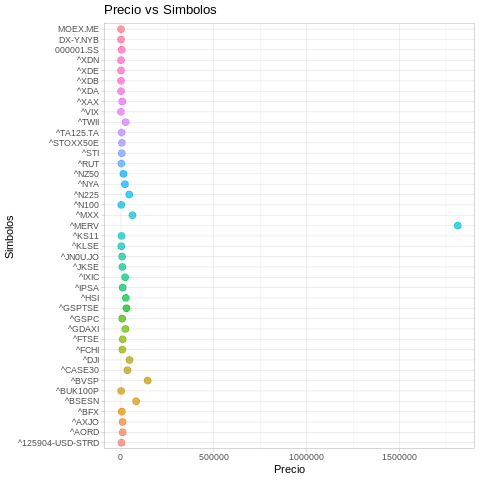

In [ ]:
%%R
ggplot(df_summary, aes(x = Price, y = Symbol, color = Symbol)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Precio vs Simbolos ", x = "Precio", y = "Simbolos ") +
  theme_light() +
  theme(legend.position = "none")

* Miremos que tan correlacionadas estan las variables.


In [ ]:
%%R
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/RtmpWBtkTy/downloaded_packages’


In [ ]:
%%R
# Matriz de correlaciones
cor_matrix <- cor(df_summary[, c("Price", "Change", "ChangePor", "Volumen")], use = "complete.obs")


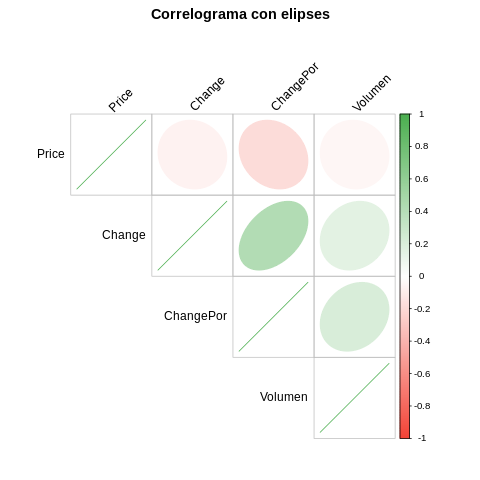

In [ ]:
%%R
# Correlograma con elipses
corrplot(cor_matrix, method = "ellipse", type = "upper",
         tl.col = "black", tl.srt = 45, col = colorRampPalette(c("#F44336", "white", "#4CAF50"))(200),
         title = "Correlograma con elipses", mar = c(0,0,2,0))

* Ranking de rendimiento

In [ ]:
%%R
top_gainers <- df_summary %>% arrange(desc(ChangePor)) %>% head(5)
top_losers <- df_summary %>% arrange(ChangePor) %>% head(5)

print(top_gainers)
print(top_losers)



     Symbol                         Name    Price Change ChangePor    Volumen
1      ^MXX                   IPC MEXICO 61658.31   1.00      1.93   47990000
2     ^IPSA                     S&P IPSA  9142.12 168.43      1.88 1922000000
3 000001.SS                    000001.SS  3875.31  63.09      1.65 1572000000
4      ^RUT           Russell 2000 Index  2415.35  37.33      1.57          0
5      ^DJI Dow Jones Industrial Average 46096.40 605.48      1.33  247717000
     Symbol            Name      Price  Change ChangePor Volumen
1      ^VIX            ^VIX      14.90   -0.45     -2.93       0
2 ^TA125.TA       ^TA125.TA    3162.56  -34.20     -1.07       0
3     ^MERV          MERVAL 1813119.88  -12.00     -0.66       0
4     ^KLSE           ^KLSE    1582.85   -7.90     -0.50       0
5      ^HSI HANG SENG INDEX   26086.32 -113.94     -0.43       0


Graficando la informacion anterior tendriamos

* TOP 5 GANADORES  

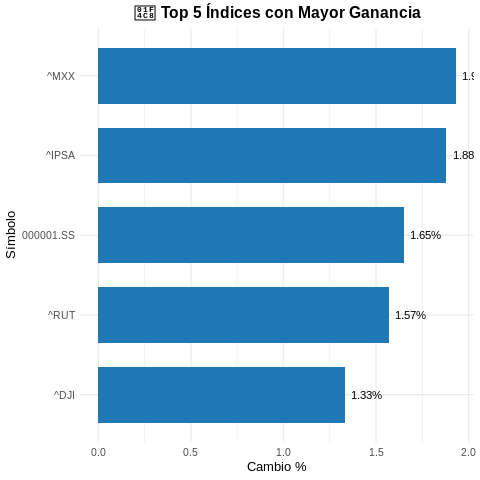

In [ ]:
%%R
library(ggplot2)
library(dplyr)

top_ganadores <- df_summary %>% arrange(desc(ChangePor)) %>% head(5)

ggplot(top_ganadores, aes(x = reorder(Symbol, ChangePor), y = ChangePor)) +
  geom_bar(stat = "identity", fill = "#1f77b4", width = 0.7) +
  geom_text(aes(label = sprintf("%.2f%%", ChangePor)), hjust = -0.2, size = 4, color = "black") +
  coord_flip() +
  labs(title = "📈 Top 5 Índices con Mayor Ganancia", x = "Símbolo", y = "Cambio %") +
  theme_minimal(base_size = 13) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))


* Top 5 de perdedores

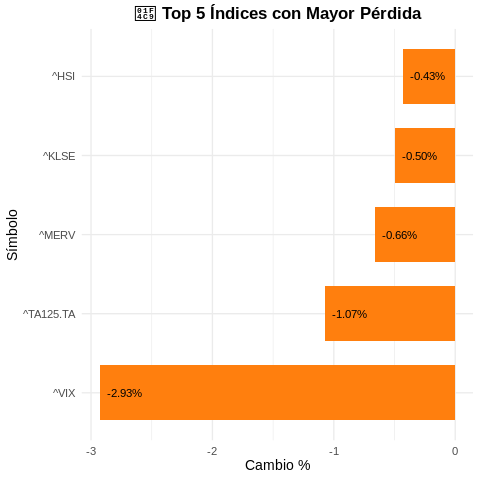

In [ ]:
%%R
top_perdedores <- df_summary %>% arrange(ChangePor) %>% head(5)

ggplot(top_perdedores, aes(x = reorder(Symbol, ChangePor), y = ChangePor)) +
  geom_bar(stat = "identity", fill = "#ff7f0e", width = 0.7) +
  geom_text(aes(label = sprintf("%.2f%%", ChangePor)), hjust = -0.2, size = 4, color = "black") +
  coord_flip() +
  labs(title = "📉 Top 5 Índices con Mayor Pérdida", x = "Símbolo", y = "Cambio %") +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))


* Realizaremos los indices bursatiles con datos destacados, relacion entre el precio y volumen, y volumen de negociación

In [ ]:
%%R
df_summary <- na.omit(df_summary)

df_plot <- df_summary[df_summary$Volume < quantile(df_summary$Volume, 0.95),]


In [ ]:
%%R
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggrepel_0.9.6.tar.gz'
Content type 'application/x-gzip' length 149970 bytes (146 KB)
downloaded 146 KB


The downloaded source packages are in
	‘/tmp/RtmpWBtkTy/downloaded_packages’


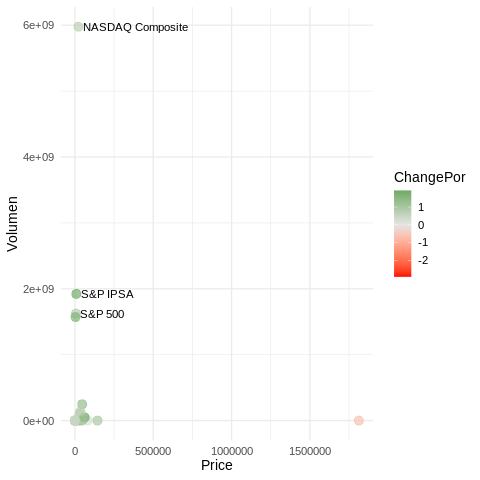

In [ ]:
%%R
library(ggrepel)
top_points <- df_summary[order(-df_summary$Volumen), ][1:3, ]

ggplot(df_summary, aes(x = Price, y = Volumen)) +
  geom_point(aes(color = ChangePor), size = 4, alpha = 0.7) +
  geom_text_repel(data = top_points, aes(label = Name), size = 4) +
  scale_color_gradient2(low = "red", mid = "gray90", high = "forestgreen", midpoint = 0) +
  theme_minimal(base_size = 14)